In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage  
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet
import datetime
import keras

Using TensorFlow backend.


In [2]:
print(str(datetime.datetime.now()))

2019-05-14 13:15:37.293772


In [3]:
mname='full_280_clean.binary'
# mname='toy2.binary'
lname='phenotype_280'
fm=os.path.abspath(mname)
fl=os.path.abspath(lname)
    
#===============
# Load raw data
#===============

#read the unitig matrix as pandas dataframe
df1=pd.read_csv(fm, delim_whitespace=True)
df1=df1.set_index(list(df1)[0])

#get [resistant] & [sentive] strains as lists
resL=[]
senL=[]
with open(fl) as f:
    for line in f:
        line=line.rstrip()
        words=line.split('\t')
        #words[2]=words[2].split('/')[1].split('.f')[0]
        if int(words[1])==0:
            #sen[words[0]]=words[2]
            senL.append(words[0])
        elif int(words[1])==1:
            #res[words[0]]=words[2]
            resL.append(words[0])
    
resL.sort()
senL.sort()

In [4]:
len(resL)

47

In [5]:
len(senL)

233

In [6]:
df1.shape

(1152012, 280)

In [7]:
#resistant strains numpy array [(unitigs,samples)]
resM=df1[resL].values

#sensitive strains numpy array [(unitigs,samples)]
senM=df1[senL].values

In [8]:
resM.shape

(1152012, 47)

In [9]:
senM.shape

(1152012, 233)

In [10]:
test_frac=0.15

# creating res_train & res_test

In [11]:
res_idx = np.random.RandomState(seed=39).permutation(resM.shape[1])

In [12]:
res_train_idx, res_test_idx = res_idx[round(resM.shape[1]*test_frac):], res_idx[:round(resM.shape[1]*test_frac)]

# # the above is equivalent to:
# train_frac=1-test_frac
# res_train_idx, res_test_idx = res_idx[:round(resM.shape[1]*train_frac)], res_idx[round(resM.shape[1]*train_frac):]

res_train, res_test = resM[:,res_train_idx], resM[:,res_test_idx]

In [13]:
res_train.shape

(1152012, 40)

In [14]:
res_test.shape

(1152012, 7)

In [15]:
res_train_idx.sort()
res_test_idx.sort()

In [16]:
res_test_idx

array([ 2,  3, 15, 16, 19, 27, 38])

In [17]:
res_train_idx

array([ 0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 17, 18, 20, 21,
       22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40,
       41, 42, 43, 44, 45, 46])

# creating sen_train & sen_test

In [18]:
sen_idx = np.random.RandomState(seed=42).permutation(senM.shape[1])

In [19]:
sen_train_idx, sen_test_idx = sen_idx[round(senM.shape[1]*test_frac):], sen_idx[:round(senM.shape[1]*test_frac)]
sen_train, sen_test = senM[:,sen_train_idx], senM[:,sen_test_idx]

In [20]:
sen_train.shape

(1152012, 198)

In [21]:
sen_test.shape

(1152012, 35)

## TESTb: stacking test_data, test_labels columns

In [22]:
newR_test=np.column_stack((res_test,res_test,res_test,res_test,res_test))
newR_test_label=np.ones((1,newR_test.shape[1]))
sen_test_label=np.zeros((1,sen_test.shape[1]))

## test_data {Xtest} and test_label {ytest}
test_data, test_label =np.column_stack((newR_test,sen_test)), np.column_stack((newR_test_label,sen_test_label))

# test_label.shape
# #(1, 70)

test_shuf_idx = np.random.RandomState(seed=41).permutation(test_data.shape[1])
test_dataT, test_labelT = test_data.T, test_label.T
Ftest_dataT, Ftest_labelT = test_dataT[test_shuf_idx], test_labelT[test_shuf_idx]

# #shuffled and transposed from test-data. Nothing fancy
# Ftest_dataT.shape
# #(70, 1152012)

In [27]:
#=======================================
# GET RIGHT SHAPE FOR {Xtest} & {ytest}
#=======================================
FtestTb = np.reshape(Ftest_dataT, (Ftest_dataT.shape[0], Ftest_dataT.shape[1],1))
Ftest_labelTb=keras.utils.to_categorical(Ftest_labelT, num_classes=2)   

In [28]:
FtestTb.shape

(70, 1152012, 1)

In [ ]:
# # Test Imbalanced binary data
# np.save('testim_x.npy', FtestTim)
# np.save('testim_y.npy', Ftest_labelTim)

# # Test Balanced binary data
# np.save('testb_x.npy', FtestTb)
# np.save('testb_y.npy', Ftest_labelTb)


## TESTim: stacking test_data, test_labels columns

In [ ]:
newR_test_label=np.ones((1,newR_test.shape[1]))
sen_test_label=np.zeros((1,sen_test.shape[1]))

## test_data {Xtest} and test_label {ytest}
test_data, test_label =np.column_stack((res_test,sen_test)), np.column_stack((newR_test_label,sen_test_label))

In [ ]:
test_shuf_idx = np.random.RandomState(seed=42).permutation(test_data.shape[1])
test_dataT, test_labelT = test_data.T, test_label.T
Ftest_dataT, Ftest_labelT = test_dataT[test_shuf_idx], test_labelT[test_shuf_idx]

# #shuffled and transposed from test-data. Nothing fancy
# Ftest_dataT.shape
# #(42, 1152012) (hopefully)

In [ ]:
#=======================================
# GET RIGHT SHAPE FOR {Xtest} & {ytest}
#=======================================
FtestTim = np.reshape(Ftest_dataT, (Ftest_dataT.shape[0], Ftest_dataT.shape[1],1))
Ftest_labelTim=keras.utils.to_categorical(Ftest_labelT, num_classes=2)   

In [ ]:
FtestTim.shape

# TRAIN shenanigens

In [29]:
# ==============================
# THIS IS WRONG, SAMPLING SHOULD BE AFTER CV SPLITS
# oversampling res_train, for 15% test split this is 5 times. 
#newR=np.column_stack((res_train,res_train,res_train,res_train,res_train))
# ==============================

In [30]:
# ==============================
# THIS IS THE CORRECT WAY 
# ==============================
newR=res_train
newR_label=np.ones((1,newR.shape[1]))

#for 15% test split, we have right amount of sen
newS=sen_train
newS_label=np.zeros((1,newS.shape[1]))

In [31]:
newR.shape

(1152012, 40)

In [32]:
newS.shape

(1152012, 198)

## TRAIN: save newR and newS as they are 

In [33]:
newRT, newR_labelT = newR.T, newR_label.T
FnewRT = np.reshape(newRT, (newRT.shape[0], newRT.shape[1],1))
FnewR_labelT = keras.utils.to_categorical(newR_labelT, num_classes=2)   

np.save('res_x.npy', FnewRT)
np.save('res_y.npy', FnewR_labelT)

In [34]:
FnewRT.shape

(40, 1152012, 1)

In [35]:
FnewR_labelT.shape

(40, 2)

In [36]:
newST, newS_labelT = newS.T, newS_label.T

rand1=np.random.RandomState(seed=43).randint(0,newST.shape[0])
rand2=np.random.RandomState(seed=44).randint(0,newST.shape[0])

trys_x=np.stack((newST[rand1],newST[rand2])) 
trys_y=np.stack((newS_labelT[rand1],newS_labelT[rand2]))

Fsdata=np.concatenate((newST,trys_x))
Fslabels=np.concatenate((newS_labelT,trys_y))

FnewST = np.reshape(Fsdata, (Fsdata.shape[0], Fsdata.shape[1],1))
FnewS_labelT = keras.utils.to_categorical(Fslabels, num_classes=2)   

np.save('sen_x.npy', FnewST)
np.save('sen_y.npy', FnewS_labelT)

In [37]:
FnewST.shape

(200, 1152012, 1)

In [38]:
FnewS_labelT.shape

(200, 2)

## TRAIN: stacking train_data, train_labels columns 

In [44]:
# did a funny (delta) up-sampling of sensitive guys, hence trivial yet important step
newS, newS_label = Fsdata.T, Fslabels.T

In [45]:
## train_data {X} and train_label {y}
train_data, train_label =np.column_stack((newR,newS)), np.column_stack((newR_label,newS_label))

In [46]:
train_data.shape
# note, after 5x oversampling the 40 resistant:  
    # we have equal resistant and  sensitive (both are 200)

(1152012, 240)

In [47]:
# shuffle just because we can?
train_shuf_idx = np.random.permutation(train_data.shape[1])
train_dataT, train_labelT=train_data.T, train_label.T
Ftrain_dataT, Ftrain_labelT=train_dataT[train_shuf_idx], train_labelT[train_shuf_idx]

In [48]:
Ftrain_dataT.shape

(240, 1152012)

In [49]:
#=========================================
# GET RIGHT SHAPE FOR {Xtrain} & {Ytrain}
#=========================================

In [50]:
FtrainT = np.reshape(Ftrain_dataT, (Ftrain_dataT.shape[0], Ftrain_dataT.shape[1],1))
Ftrain_labelT=keras.utils.to_categorical(Ftrain_labelT, num_classes=2)   

In [51]:
FtrainT.shape

(240, 1152012, 1)

In [52]:
Ftrain_dataT.size

276482880

In [53]:
# # Train binary data
# np.save('train_x.npy', FtrainT)
# np.save('train_y.npy', Ftrain_labelT)

# Test Imbalanced binary data
np.save('testim_x.npy', FtestTim)
np.save('testim_y.npy', Ftest_labelTim)

# Test Balanced binary data
np.save('testb_x.npy', FtestTb)
np.save('testb_y.npy', Ftest_labelTb)

#Human readable data
np.savetxt('train_y.txt', Ftrain_labelT)
np.savetxt('testim_y.txt', Ftest_labelTim)
np.savetxt('testb_y.txt', Ftest_labelTb)

In [54]:
print(str(datetime.datetime.now()))

2019-05-14 13:24:34.289079


# End of cleaning & data wrangling part

In [2]:
###BOtrial

x = np.arange(10)
x.shape

(10,)

In [3]:
x.reshape(2,5)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [4]:
x    #as did not assign the reshape 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
y = np.arange(35).reshape(5,7)
y

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [6]:
y[1:4:2,::3]

array([[ 7, 10, 13],
       [21, 24, 27]])

In [7]:
np.random.randint(0,281,1000).max()

280

In [8]:
####EOtrial

In [9]:
fm=os.path.abspath(mname)
fl=os.path.abspath(lname)
fakeSamples=233

In [11]:
df1=pd.read_csv(os.path.abspath(mname), delim_whitespace=True)
df1=df1.set_index(list(df1)[0])
#df1.shape
#(1000, 280)

In [12]:
unitigCount=df1.values.shape[0]

In [13]:
bg_null=np.random.randint(0,2,size=(unitigCount,fakeSamples))

In [14]:
bg_null.shape

(1000, 233)

In [15]:
bg_null[:,1:4].shape

(1000, 3)

In [16]:
# res={}
# sen={}
resL=[]
senL=[]
with open(fl) as f:
    for line in f:
        line=line.rstrip()
        words=line.split('\t')
        words[2]=words[2].split('/')[1].split('.f')[0]
        if int(words[1])==0:
            #sen[words[0]]=words[2]
            senL.append(words[0])
        else:
            #res[words[0]]=words[2]
            resL.append(words[0])

In [17]:
resL.sort()
senL.sort()

In [18]:
resL

['WH-SGI-V-07050',
 'WH-SGI-V-07053',
 'WH-SGI-V-07071',
 'WH-SGI-V-07073',
 'WH-SGI-V-07165',
 'WH-SGI-V-07179',
 'WH-SGI-V-07181',
 'WH-SGI-V-07227',
 'WH-SGI-V-07230',
 'WH-SGI-V-07233',
 'WH-SGI-V-07236',
 'WH-SGI-V-07247',
 'WH-SGI-V-07253',
 'WH-SGI-V-07256',
 'WH-SGI-V-07259',
 'WH-SGI-V-07268',
 'WH-SGI-V-07276',
 'WH-SGI-V-07309',
 'WH-SGI-V-07320',
 'WH-SGI-V-07322',
 'WH-SGI-V-07323',
 'WH-SGI-V-07324',
 'WH-SGI-V-07325',
 'WH-SGI-V-07327',
 'WH-SGI-V-07329',
 'WH-SGI-V-07415',
 'WH-SGI-V-07425',
 'WH-SGI-V-07484',
 'WH-SGI-V-07486',
 'WH-SGI-V-07487',
 'WH-SGI-V-07496',
 'WH-SGI-V-07622',
 'WH-SGI-V-07625',
 'WH-SGI-V-07626',
 'WH-SGI-V-07627',
 'WH-SGI-V-07628',
 'WH-SGI-V-07633',
 'WH-SGI-V-07635',
 'WH-SGI-V-07638',
 'WH-SGI-V-07643',
 'WH-SGI-V-07644',
 'WH-SGI-V-07646',
 'WH-SGI-V-07648',
 'WH-SGI-V-07651',
 'WH-SGI-V-07687',
 'WH-SGI-V-07702',
 'WH-SGI-V-07703']

In [19]:
df1.shape

(1000, 280)

In [20]:
#resistant strains
resdf=df1[resL]
resM=resdf.values

In [21]:
#sensitive strains
sendf=df1[senL]
senM=sendf.values

In [22]:
df1.values.nbytes

2240000

In [23]:
senM.shape


(1000, 233)

In [24]:
resM.shape

(1000, 47)

In [25]:
bgNull=bg_null.sum(axis=1)
stats.describe(bgNull)

DescribeResult(nobs=1000, minmax=(95, 137), mean=116.544, variance=54.45251651651652, skewness=-0.09454981486215464, kurtosis=-0.14390013645297817)

In [26]:
senTrue=senM.sum(axis=1)
stats.describe(senTrue)

DescribeResult(nobs=1000, minmax=(1, 127), mean=40.041, variance=1115.77109009009, skewness=0.8219240841542729, kurtosis=-0.5179730527320436)

In [27]:
resTrue=resM.sum(axis=1)    
stats.describe(resTrue)

DescribeResult(nobs=1000, minmax=(0, 40), mean=8.24, variance=76.0004004004004, skewness=0.9949397525032871, kurtosis=-0.22469685464554878)

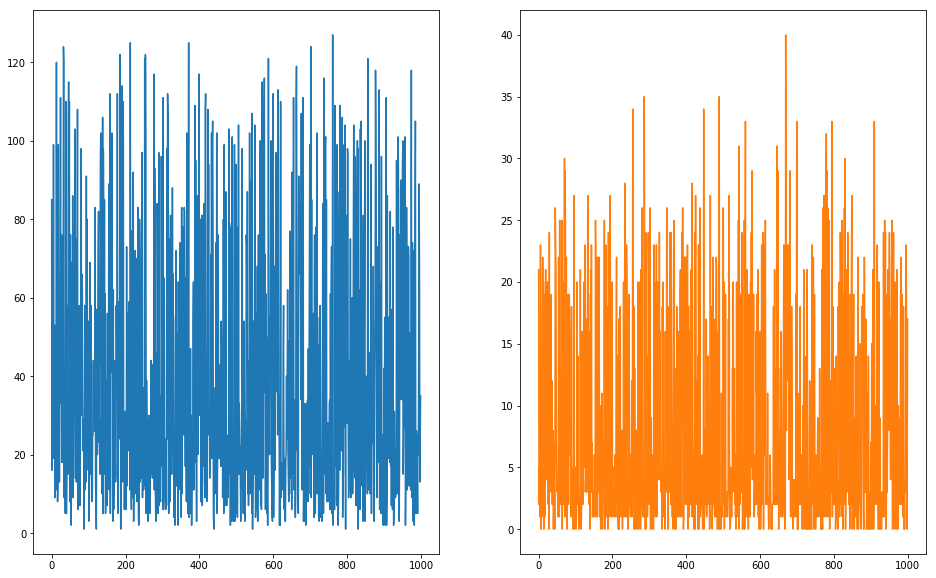

In [28]:
plt.figure(figsize=(16,10))
plt.subplot(121)
plt.plot(senTrue,color='C0')
plt.subplot(122)
plt.plot(resTrue,color='C1')

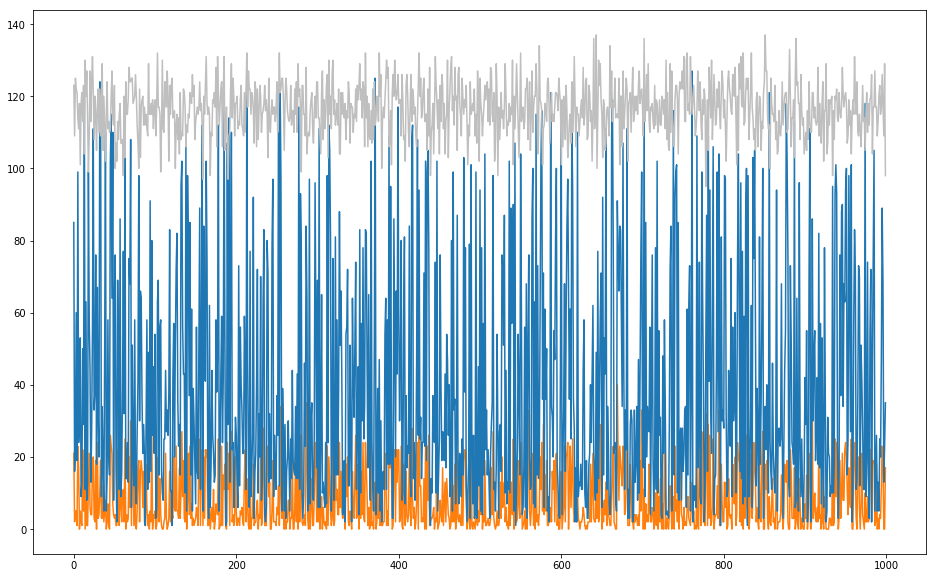

In [29]:
plt.figure(figsize=(16,10))
plt.plot(resTrue,color='C1')
plt.plot(senTrue,color='C0')
plt.plot(bgNull,color='0.75')

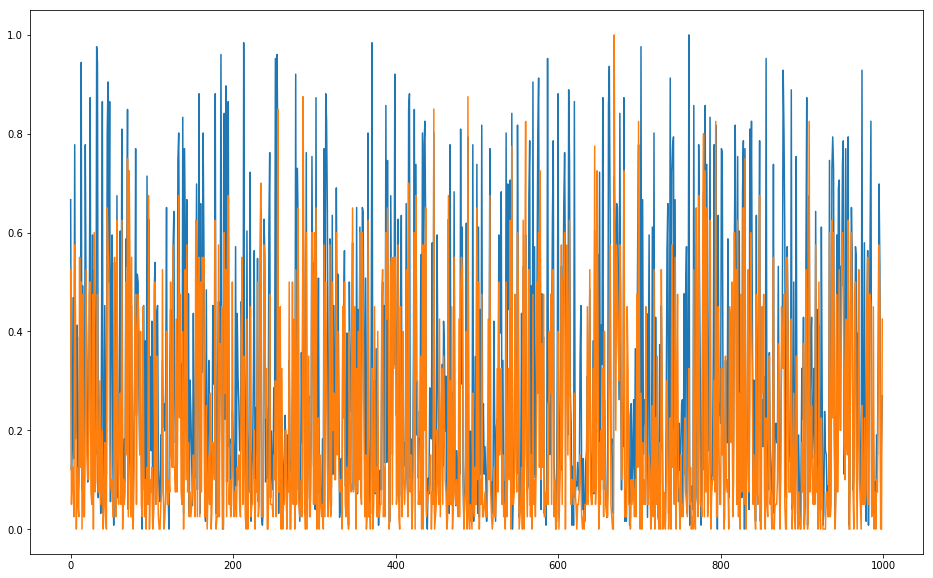

In [30]:
plt.figure(figsize=(16,10))
plt.plot((senTrue-min(senTrue))/(max(senTrue)-min(senTrue)),color='C0')
plt.plot((resTrue-min(resTrue))/(np.ptp(resTrue)),color='C1')
#plt.plot((bgNull-min(bgNull))/(np.ptp(bgNull)),color='0.75')



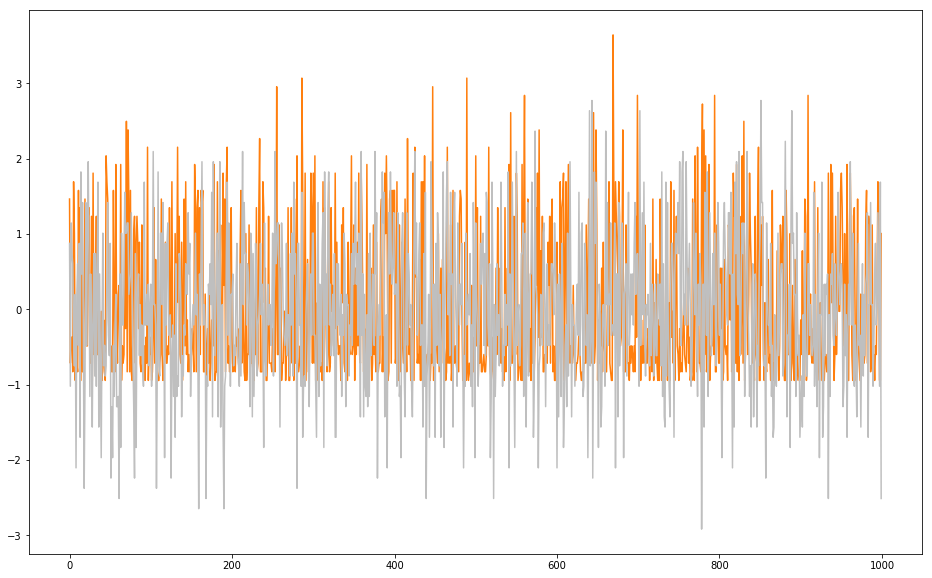

In [31]:
plt.figure(figsize=(16,10))
#plt.plot((senTrue-np.mean(senTrue))/(np.std(senTrue)), color='C0')
plt.plot((resTrue-np.mean(resTrue))/(np.std(resTrue)), color='C1')
plt.plot((bgNull-np.mean(bgNull))/(np.std(bgNull)), color='0.75')

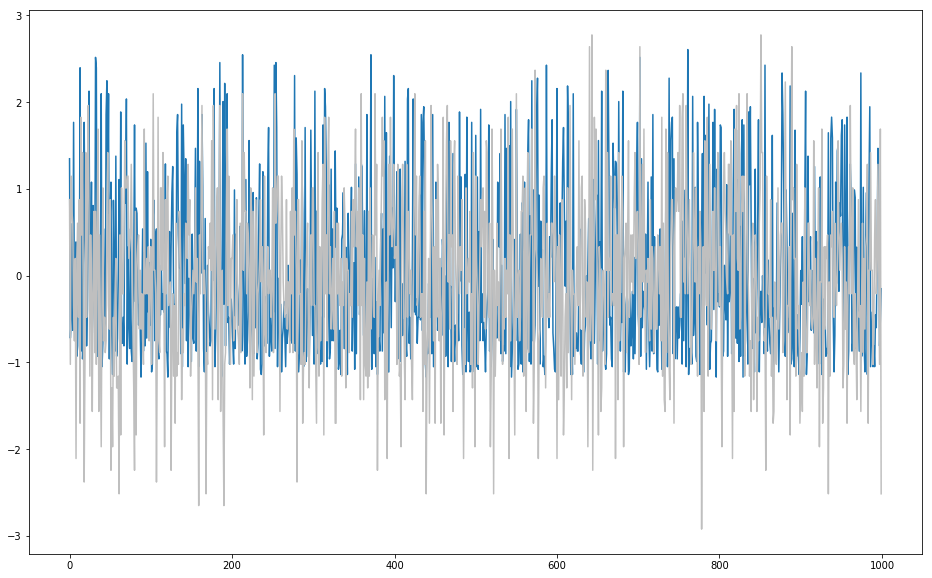

In [32]:
plt.figure(figsize=(16,10))
plt.plot((senTrue-np.mean(senTrue))/(np.std(senTrue)),color='C0')
#plt.plot((resTrue-np.mean(resTrue))/(np.std(resTrue)),color='C1')
plt.plot((bgNull-np.mean(bgNull))/(np.std(bgNull)),color='0.75')

In [33]:
df2=df1.values

In [34]:
dt = linkage(df2.transpose(), 'ward')
rDt=linkage(resM.transpose(),'ward')
sDt=linkage(senM.transpose(),'ward')
callt, coph_dists_allt= cophenet(dt, pdist(df2.transpose()))
crest, coph_dists_rest= cophenet(rDt, pdist(resM.transpose()))
csent, coph_dists_sent= cophenet(sDt, pdist(senM.transpose()))
callt


0.7671489610237536

In [35]:
dt = linkage(df2.transpose(), 'single')
rDt=linkage(resM.transpose(),'single')
sDt=linkage(senM.transpose(),'single')
callt, coph_dists_allt= cophenet(dt, pdist(df2.transpose()))
crest, coph_dists_rest= cophenet(rDt, pdist(resM.transpose()))
csent, coph_dists_sent= cophenet(sDt, pdist(senM.transpose()))


In [36]:
dt = linkage(df2.transpose(), 'complete')
rDt=linkage(resM.transpose(),'complete')
sDt=linkage(senM.transpose(),'complete')
callt, coph_dists_allt= cophenet(dt, pdist(df2.transpose()))
crest, coph_dists_rest= cophenet(rDt, pdist(resM.transpose()))
csent, coph_dists_sent= cophenet(sDt, pdist(senM.transpose()))


In [37]:
callt

0.9671932770546021

In [38]:
crest

0.9912775270201886

In [39]:
csent

0.9664330920954989

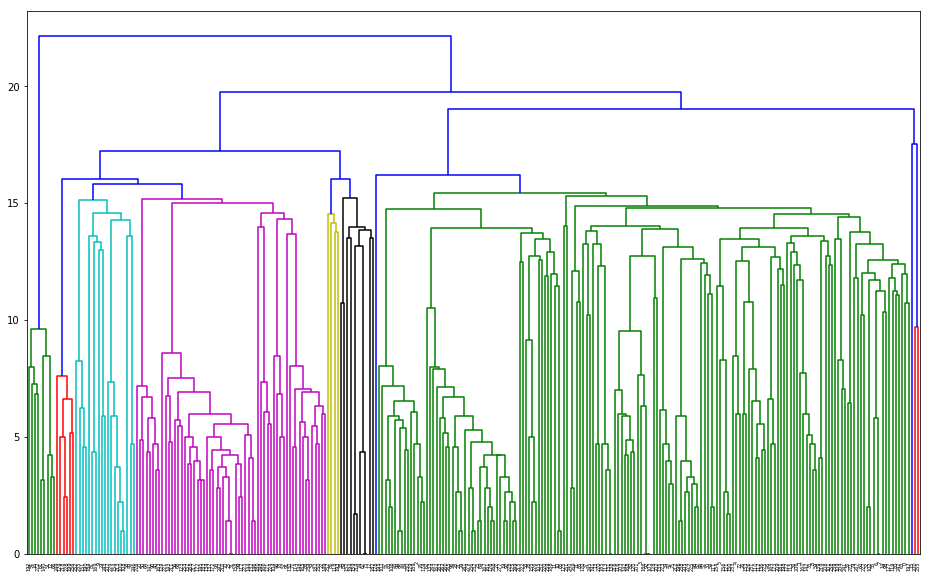

In [40]:
plt.figure(figsize=(16, 10))  
dendrogram(dt,  
            orientation='top',
            #labels=labelList,
            #distance_sort='descending',
            #show_leaf_counts=True
          )
plt.show()  

In [41]:
np.where(df2[:,1]==1)


(array([ 24,  26,  32,  39,  42,  48,  60,  63,  85,  90,  92,  94, 103,
        125, 130, 132, 134, 138, 140, 148, 157, 158, 163, 185, 191, 193,
        213, 217, 239, 244, 245, 252, 255, 261, 262, 279, 280, 287, 300,
        305, 308, 312, 314, 316, 343, 352, 360, 366, 383, 394, 399, 407,
        417, 434, 436, 442, 445, 482, 502, 504, 519, 530, 536, 538, 565,
        566, 569, 571, 576, 592, 594, 600, 607, 609, 613, 620, 637, 646,
        651, 652, 658, 662, 668, 673, 674, 690, 693, 695, 702, 704, 716,
        718, 734, 738, 752, 755, 757, 761, 763, 767, 792, 801, 818, 819,
        823, 828, 838, 844, 856, 876, 877, 884, 907, 908, 915, 919, 924,
        934, 938, 946, 962, 977, 996]),)

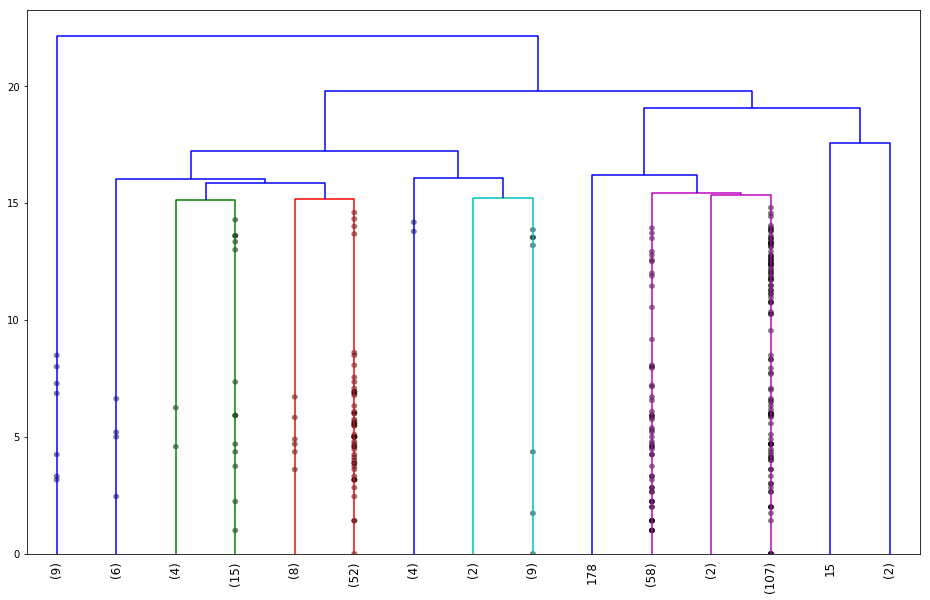

In [42]:
plt.figure(figsize=(16, 10))  
dendo=dendrogram(dt,leaf_rotation=90.,  # rotates the x axis labels 
           #leaf_font_size=8.,  # font size for the x axis labels
           truncate_mode='lastp',  # show only the last p merged clusters
           p=15,  # show only the last p merged clusters
           show_contracted=True
           )
plt.show()  

In [43]:
dendo['ivl']

['(9)',
 '(6)',
 '(4)',
 '(15)',
 '(8)',
 '(52)',
 '(4)',
 '(2)',
 '(9)',
 '178',
 '(58)',
 '(2)',
 '(107)',
 '15',
 '(2)']

In [44]:
dendo['icoord']

[[25.0, 25.0, 35.0, 35.0],
 [45.0, 45.0, 55.0, 55.0],
 [30.0, 30.0, 50.0, 50.0],
 [15.0, 15.0, 40.0, 40.0],
 [75.0, 75.0, 85.0, 85.0],
 [65.0, 65.0, 80.0, 80.0],
 [27.5, 27.5, 72.5, 72.5],
 [115.0, 115.0, 125.0, 125.0],
 [105.0, 105.0, 120.0, 120.0],
 [95.0, 95.0, 112.5, 112.5],
 [135.0, 135.0, 145.0, 145.0],
 [103.75, 103.75, 140.0, 140.0],
 [50.0, 50.0, 121.875, 121.875],
 [5.0, 5.0, 85.9375, 85.9375]]

In [45]:
dendo['dcoord']

[[0.0, 15.132745950421556, 15.132745950421556, 0.0],
 [0.0, 15.165750888103101, 15.165750888103101, 0.0],
 [15.132745950421556,
  15.84297951775486,
  15.84297951775486,
  15.165750888103101],
 [0.0, 16.0312195418814, 16.0312195418814, 15.84297951775486],
 [0.0, 15.231546211727817, 15.231546211727817, 0.0],
 [0.0, 16.06237840420901, 16.06237840420901, 15.231546211727817],
 [16.0312195418814, 17.233687939614086, 17.233687939614086, 16.06237840420901],
 [0.0, 15.329709716755891, 15.329709716755891, 0.0],
 [0.0, 15.427248620541512, 15.427248620541512, 15.329709716755891],
 [0.0, 16.217274740226856, 16.217274740226856, 15.427248620541512],
 [0.0, 17.549928774784245, 17.549928774784245, 0.0],
 [16.217274740226856,
  19.05255888325765,
  19.05255888325765,
  17.549928774784245],
 [17.233687939614086, 19.77371993328519, 19.77371993328519, 19.05255888325765],
 [0.0, 22.135943621178654, 22.135943621178654, 19.77371993328519]]

In [46]:
# d = linkage(df2, 'ward')
# rD=linkage(resM,'ward')
# sD=linkage(senM,'ward')
# call, coph_dists_all= cophenet(d, pdist(df2))
# cres, coph_dists_res= cophenet(rD, pdist(resM))
# csen, coph_dists_sen= cophenet(sD, pdist(senM))

In [47]:
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
X

[[2], [8], [0], [4], [1], [9], [9], [0]]

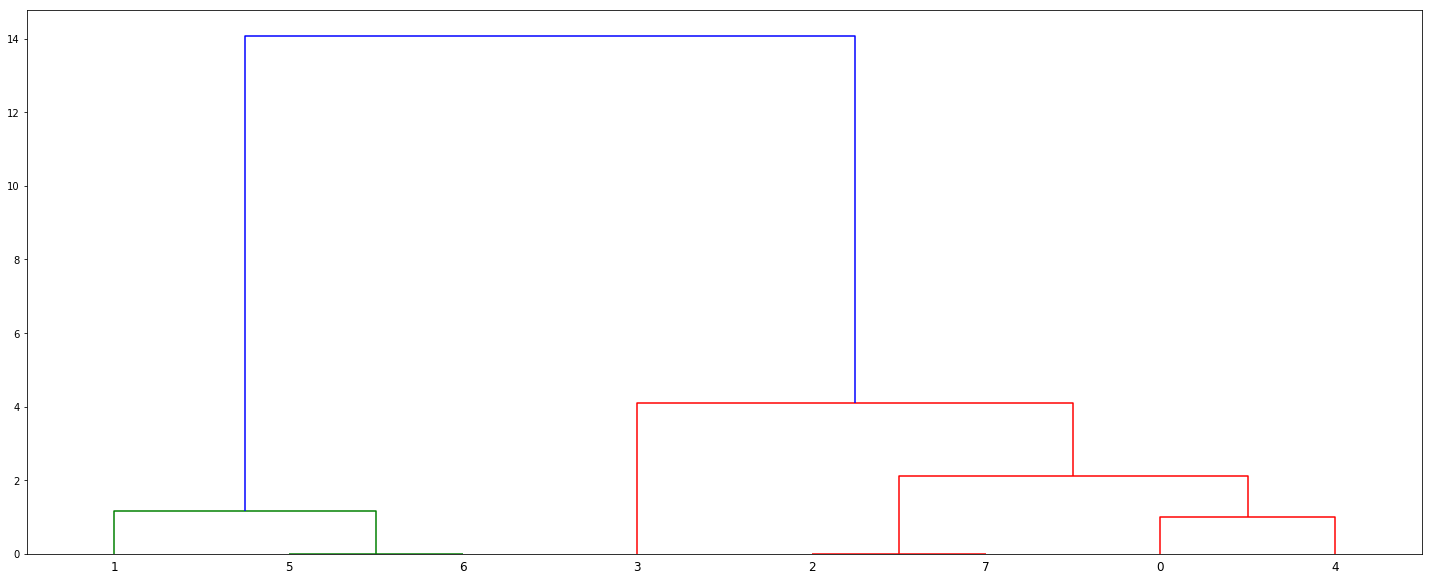

In [48]:
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [ ]:
# ==========================================
# RANDOM NUMPY COMMANDS
# ==========================================

In [49]:
senM.shape

(1000, 233)

In [50]:
#47,94,141,188
factor=2
resM.shape


(1000, 47)

In [51]:
bg_null.shape

(1000, 233)

In [151]:
####sampling columns from np arrays
idx=np.random.choice(senM.shape[1],size=resM.shape[1]*factor,replace=False)


In [150]:
newS=senM[:,idx]
newS.shape


(1000, 47)

In [98]:
newS_label=np.zeros((1,newS.shape[1]))
newS_label

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [61]:
if factor==2:
    newR=np.column_stack((resM,resM))
if factor==3:    
    newR=np.column_stack((resM,resM,resM))

newR.shape

(1000, 94)

In [99]:
newR_label=np.ones((1,newR.shape[1]))
newR_label

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [100]:
np.random.shuffle(np.transpose(newR))
np.random.shuffle(np.transpose(newS))

data=np.column_stack((newR,newS))
label=np.column_stack((newR_label,newS_label))



In [101]:
data.shape

(1000, 188)

In [105]:
label.shape

(1, 188)

In [64]:
#Numpy basics
#c=np.transpose(b)
#newR.shape
# a=np.array([1, 2, 3, 4, 5])
# b = a + 1

# print (a)
# print (b)
# [1 2 3 4 5]
# [2 3 4 5 6]

# a=np.array([1, 2, 3, 4, 5])
# # Add 0 to `a`:
# b = a + 0

# print (a)
# print (b)
# [1 2 3 4 5]
# [1 2 3 4 5]

# b is a
# False

In [87]:
# x1=np.random.rand(1000,newR.shape[1])

# indices1 = np.random.permutation(newR.shape[1])
# splitfrac1=0.7
# range1=round(newR.shape[1]*splitfrac1)

# training_idx, test_idx = indices1[:range1], indices[range1:]
# training, test = x1[:,training_idx], x1[:,test_idx]


# indices2 = np.random.permutation(test.shape[1])
# splitfrac2=0.5
# range2=round(test.shape[1]*splitfrac2)

# val_idx, test_idx = indices2[:range2], indices2[range2:]
# val, test = test[:,val_idx], x1[:,test_idx]

In [142]:
#### does this work??

indices1 = np.random.permutation(data.shape[1])
#label.shape[1] is same as data.shape[1]
splitfrac1=0.7   #70 % training data ~30 % b/w test and val
range1=round(data.shape[1]*splitfrac1)

train_idx, test_idx = indices1[:range1], indices1[range1:]
train, test = data[:,train_idx], data[:,test_idx]
train_label, test_label= label[:,train_idx], label[:,test_idx]


indices2 = np.random.permutation(test.shape[1])
splitfrac2=0.5   #15% val and 15% test
range2=round(test.shape[1]*splitfrac2)

val_idx, test_idx = indices2[:range2], indices2[range2:]
val, test = test[:,val_idx], test[:,test_idx]
val_label, test_label = test_label[:,val_idx], test_label[:,test_idx]


In [143]:
test1.shape

(1000, 28)

In [144]:
val.shape

(1000, 28)

In [145]:
test_idx

array([28, 25, 16,  0, 51, 21, 32, 40,  5, 14, 12, 15, 50, 22, 43,  9, 20,
       27, 19, 37, 10, 54, 13, 30, 49, 44, 11, 38])

In [146]:
val_idx

array([47, 41,  8,  6, 35, 55, 39,  2, 36, 48, 17, 31, 45, 42, 46, 24, 34,
       33,  3, 52, 18,  7, 23,  1, 26,  4, 29, 53])

In [147]:
val_label

array([[0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
        0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.]])

In [103]:
# from sklearn.model_selection import train_test_split

# data, labels = np.arange(40).reshape((20, 2)), range(20)
# data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.20, random_state=42)

# x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)